# 1 Data Wrangling: Breast Cancer Gene Expressions

## 1.1 Contents <a id='1.1_Contents'></a>
* [1 Data wrangling](#1_Data_wrangling)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Load the Breast Cancer Data](#1.4_Load_Data)
  * [1.5 Explore The Data](#1.5_Explore)
      * [1.5.1 Check For Missing Data](#1.5.1_Missing_Data)
      * [1.5.2 Checking Out The Data](#1.5.2_Check_Data)
      * [1.5.3 Splitting The Data](#1.5.3_Split_Data)
           * [1.5.3a Create Z Score Dataframe (z_scores)](#1.5.3a_Z_Scores)
           * [1.5.3b  Create Clinical Attributes Dataframe (clinical_data)](#1.5.3bclinical)
           * [1.5.3c Create Gene Mutation Dataframe (genes)](#1.5.3cgenes)           
  * [1.6 Clinical Data Wrangling](#1.6clinical)
      * [1.6.1 Missing Data](#1.6.1_Missing)
      * [1.6.2 Datatypes](#1.6.2_Datatypes)
  * [1.7 Z Scores Wranglig](#1.7z_scores)
  * [1.8 Gene Mutations Wrangling](#1.8genes)
  * [1.9 Merging our data frames back together](#1.9merge)
  * [1.10 Exporting the Data](#1.10_Export)
  * [1.11 Summary](#1.11_Summary)
  * [1.12 Next Steps](#1.12_Next)

## 1.2 Introduction  <a id='1.2_Introduction'></a>

Breast cancer is the most frequently occurring cancer in women, and the leading cause of cancer-related deaths in women. The most important part of the decision making process for cancer patients is the accurate estimation of prognosis and survival duration, but the reality is that these are hard to predict because gene expression greatly impacts these metrics.  Breast cancer patients with the same stage of the disease and the same clinical attributes can have different treatment responses and overall survival outcomes. This difference in outcomes is likely attributed to differences in gene expressions for specific genetic mutations. 

In this capstone project I will be using the clinical data, z scores, and genetic mutation data to predict if a patient with primary breast cancer will die of disease or not. 

This first notebook is dedicated to cleaning and data wrangling. 

This dataset is sourced from https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric


## 1.3 Imports <a id= '1.3_Imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno


## 1.4 Load the Breast Cancer Data <a id= '1.4_Load_Data'></a>

In [2]:
raw_data = pd.read_csv(r'C:\Users\leann\OneDrive\Desktop\SPRINGBOARD\capstone 2\breast_cancer_data\METABRIC_RNA_Mutation.csv')

C:\Users\leann\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [4]:
raw_data.info

<bound method DataFrame.info of       patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellula

In [5]:
raw_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


## 1.5 Explore The Data <a id= '1.5_Explore'></a>

### 1.5.1 Check For Missing Data <a id= '1.5.1_Missing_Data'></a>

In [6]:
column_names= raw_data.columns
print(column_names)

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)


In [7]:
#check for missing data.
missing = pd.concat([raw_data.isnull().sum(),100*raw_data.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing = missing.sort_values(by='Count',ascending=False)
missing.head(30)

,Count,%
tumor_stage,501,26.313025
3-gene_classifier_subtype,204,10.714286
primary_tumor_laterality,106,5.567227
neoplasm_histologic_grade,72,3.781513
cellularity,54,2.836134
mutation_count,45,2.363445
er_status_measured_by_ihc,30,1.575630
type_of_breast_surgery,22,1.155462
tumor_size,20,1.050420
cancer_type_detailed,15,0.787815


It looks like tumor_stage is missing from 26% of patients, 3-gene_classifier_subtype from 12% of patients, primary_tumor_laterality from 6% of patients. 

The data is only missing from clinical attributes, not the z scores or genetic mutation data. This tells me something different is going on in the clinical data, and I should look at that separately. 

we are missing data from 'death_from_cancer'. Looking at this row, this patient died after 255 months. We do not know if they died from cancer or other causes, so we should remove this row. 

In [8]:
#looking at the clinical attributes for the patient missing the 'death_from_cancer' data
missing_death = raw_data[raw_data['death_from_cancer'].isnull()]
missing_death

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1166,5130,58.61,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,0,LumA,3.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#dropping the row with null death_from_cancer
raw_data = raw_data.dropna(subset=['death_from_cancer'])
raw_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


### 1.5.2 Checking out the data <a id= '1.5.2_Check_Data'></a>  

Here I am exploring the data: Looking at the columns that are objects, to see what my column names are and the associated index, what kind of data type my z_scores are, and if there are duplicates. 

In [10]:
# Next look at non-numeric columns. 

raw_data.select_dtypes('object')

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,0,0,0,0,0,0,0,0,0,0
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#I want to get index and column name for all my columns

column_names=pd.DataFrame(columns=['index_number', 'column_name'])

for i, col in enumerate(raw_data.columns):
   column_names = column_names.append({'column_name': col, 'index_number': i}, ignore_index=True)

column_names.set_index('index_number', inplace=True)
column_names.head()

#I will also need a list of the column names:

column_name_list = list(raw_data.columns)

I see that columns 0:30 are clinical attributes, and from 31 on it is genetic data. I know that part of that is z scores and part of that is mutations. I think I need to divide this into 3 different data sets, and keep the patient ID as the constant in all of them. 



In [12]:
print('Columns in column_names: ', column_names)

Columns in column_names:                           column_name
index_number                        
0                         patient_id
1                   age_at_diagnosis
2             type_of_breast_surgery
3                        cancer_type
4               cancer_type_detailed
...                              ...
688                         hras_mut
689                        prps2_mut
690                      smarcb1_mut
691                        stmn2_mut
692                        siah1_mut

[693 rows x 1 columns]


In [13]:
#I want to find datatype of the Z score data -it is float64. 
raw_data['cul1'].describe()

count    1903.000000
mean       -0.000130
std         1.000509
min        -3.179400
25%        -0.631800
50%        -0.066600
75%         0.496100
max         5.621200
Name: cul1, dtype: float64

In [14]:
# see if we have any dupliated data... we do not!

print('duplicate rows: ',raw_data.duplicated().sum())


print('duplicate columns: ', raw_data.duplicated(subset=column_name_list).sum())

duplicate rows:  0
duplicate columns:  0


## 1.5.3 Splitting the Data <a id= '1.5.3_Split_Data'></a>

This is primarily so that I can clean up my clinical data, and see how many columns I have for each section of my data. There are 3 distinct sections of the data: clinical attributes, z scores, and genetic mutations. They aren't directly related to each other, and may need to be wrangled differently. I will not remove any patients from my data in this stage, only columns, so it will be easy to merge them back together later. 

### 1.5.3a Create Z Scores Dataframe (z_scores): <a id= '1.5.3a_Z_Scores'></a>

I was previously able to see that all of the z scores data has a datatype of float64, and rew of the other data has this datatype. As I don't know when the z scores data starts and stops, I think it will be the easiest to filter by datatype and create my new z_scores dataframe this way. 

In [15]:
#make dataframe of only Z score data. I can see that it included clinical data but not patient IDs. Need to fix this. 

#filtering for data that is float64
z_scores= raw_data.select_dtypes(include=['float64'])
print('z_score info: ',z_scores.info())

z_scores.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1903
Columns: 498 entries, age_at_diagnosis to ugt2b7
dtypes: float64(498)
memory usage: 7.2 MB
z_score info:  None


,age_at_diagnosis,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,tumor_stage,brca1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,75.65,1.0,3.0,10.0,NaN,6.044,140.500000,22.0,2.0,-1.3990,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,43.19,1.0,3.0,0.0,2.0,4.020,84.633333,10.0,1.0,-1.3800,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,48.87,1.0,2.0,1.0,2.0,4.030,163.700000,15.0,2.0,0.0670,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,47.68,1.0,2.0,3.0,1.0,4.050,164.933333,25.0,2.0,0.6744,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,76.97,1.0,3.0,8.0,2.0,6.080,41.366667,40.0,2.0,1.2932,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [16]:
# dropping the clinical data, and starting with z-scores. 
z_scores = z_scores.drop(z_scores.loc[: , : 'tumor_stage'], axis = 1)
z_scores.head()

#add back in patient_id from raw_data:
z_scores=z_scores.join(raw_data['patient_id'],how='left')

#put patient_id at the beginning of the DF, moving it from the end:
z_scores.insert(0, 'patient_id', z_scores.pop('patient_id'))
z_scores.head()


,patient_id,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


### 1.5.3b Create Clinical Attributes Dataframe (clinical_data):  <a id= '1.5.3bclinical'></a>


In [17]:
# in our initial raw_data.info() I could see that 'death_from_cancer' was the last column in our clinical section. 
#Creating new dataframe for clinical data

clinical_data = raw_data.loc[: , :'death_from_cancer']
clinical_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


### 1.5.3c Create Genetic Mutation Dataframe (genes):  <a id= '1.5.3cgenes'></a>

In [18]:
# the gene mutation data are the last section of columns, so I need to drop my columns up through the last column of the
#previous (z_scores) section, which is 'ugt2b7'

genes = raw_data.drop(raw_data.loc[: , : 'ugt2b7'], axis = 1)
genes.head()

#add back in patient_id like above
genes=genes.join(raw_data['patient_id'],how='left')

#put patient_id at the beginning of the DF, moving it from the end:
genes.insert(0, 'patient_id', genes.pop('patient_id'))
genes.head()



,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,H178P,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,H1047R,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,E542K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,S241F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.6 Clinical Data Wrangling:  <a id= '1.6clinical'></a>

In [19]:
#let's look at the data in the clinical attributes. 

#I'd like to see the names of all the columns in clinical_data listed, so I can refer to them: 
for col in clinical_data:
    print(col)

patient_id
age_at_diagnosis
type_of_breast_surgery
cancer_type
cancer_type_detailed
cellularity
chemotherapy
pam50_+_claudin-low_subtype
cohort
er_status_measured_by_ihc
er_status
neoplasm_histologic_grade
her2_status_measured_by_snp6
her2_status
tumor_other_histologic_subtype
hormone_therapy
inferred_menopausal_state
integrative_cluster
primary_tumor_laterality
lymph_nodes_examined_positive
mutation_count
nottingham_prognostic_index
oncotree_code
overall_survival_months
overall_survival
pr_status
radio_therapy
3-gene_classifier_subtype
tumor_size
tumor_stage
death_from_cancer


### 1.6.1 Missing Data   <a id= '1.6.1_Missing'></a>

In [20]:
#look at missing data here
missing_clinical = pd.concat([clinical_data.isnull().sum(),100*clinical_data.isnull().mean()], axis=1)
missing_clinical.columns=['Count', '%']
missing_clinical = missing.sort_values(by='Count',ascending=False)
missing_clinical.head(13)

,Count,%
tumor_stage,501,26.313025
3-gene_classifier_subtype,204,10.714286
primary_tumor_laterality,106,5.567227
neoplasm_histologic_grade,72,3.781513
cellularity,54,2.836134
mutation_count,45,2.363445
er_status_measured_by_ihc,30,1.575630
type_of_breast_surgery,22,1.155462
tumor_size,20,1.050420
oncotree_code,15,0.787815


I want to visualize the missing data so that I can see if there are obvious patterns. The primary_tumor_laterality, 3_gene_classifier_subtype, and tumor_stage all are all missing over 5%, so those are the ones I'd like to look at. 

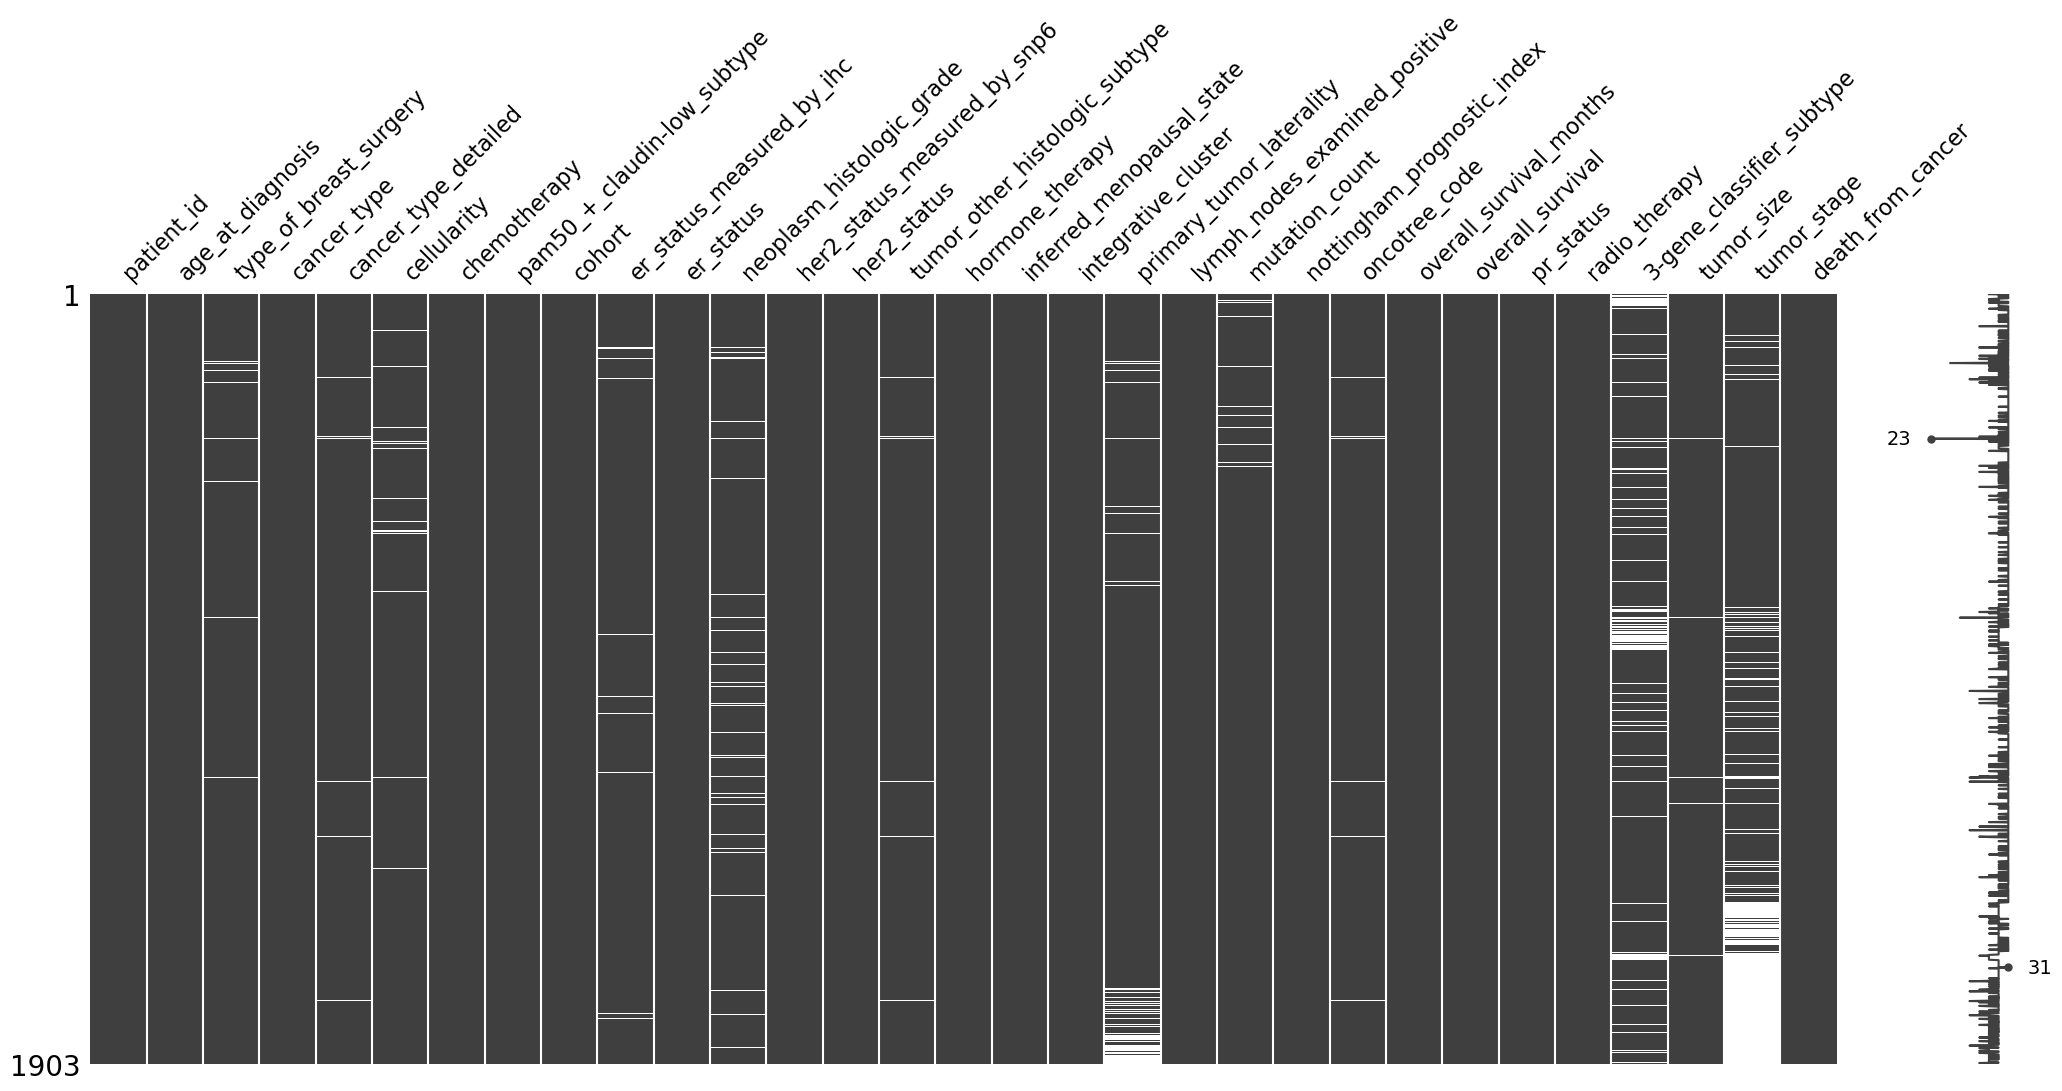

In [21]:
#Looking at the overall missingness of clinical_data:

msno.matrix(clinical_data)
plt.show()

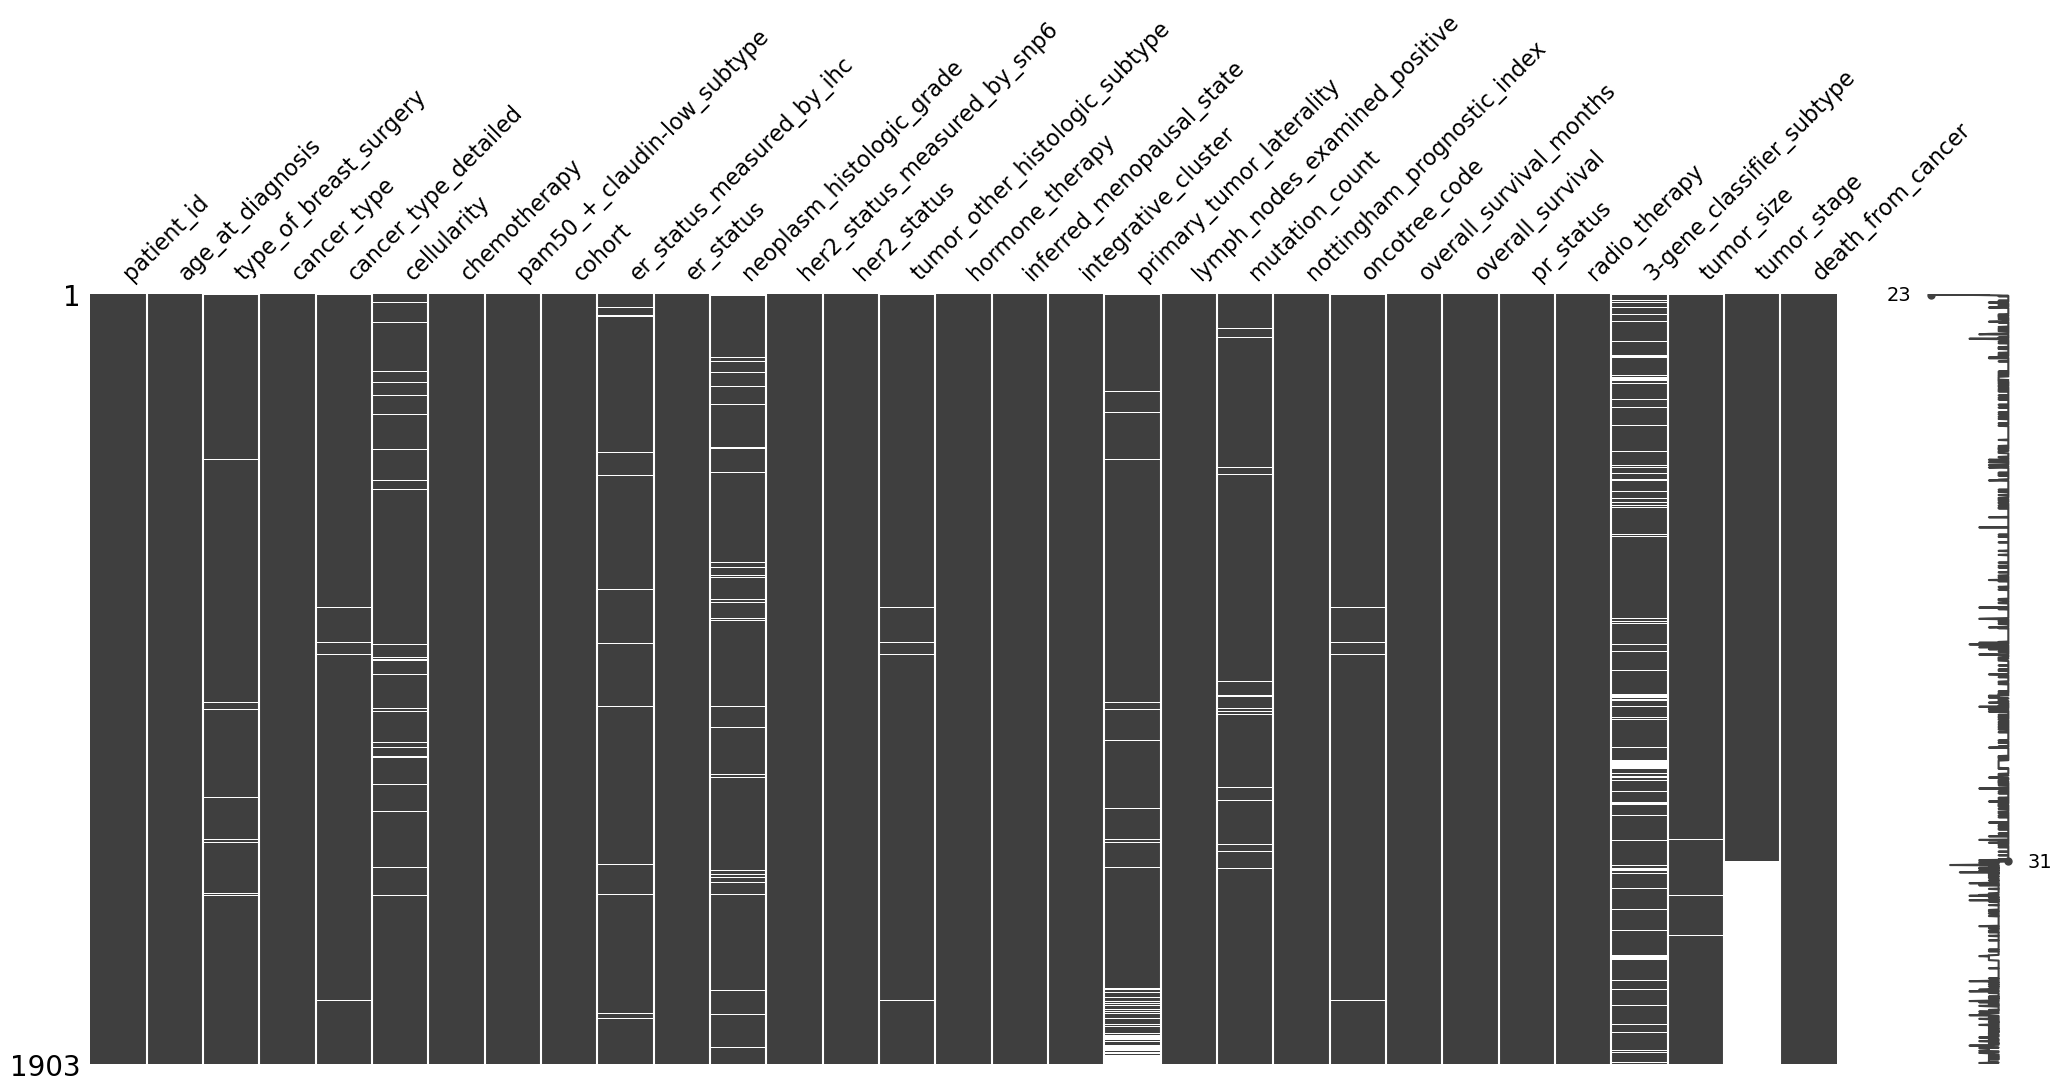

In [22]:
#  Sorting by missing tumor_stage, as that is missing 26%. 

clinical_data_sorted = clinical_data.sort_values(by = 'tumor_stage')
msno.matrix(clinical_data_sorted)
plt.show()

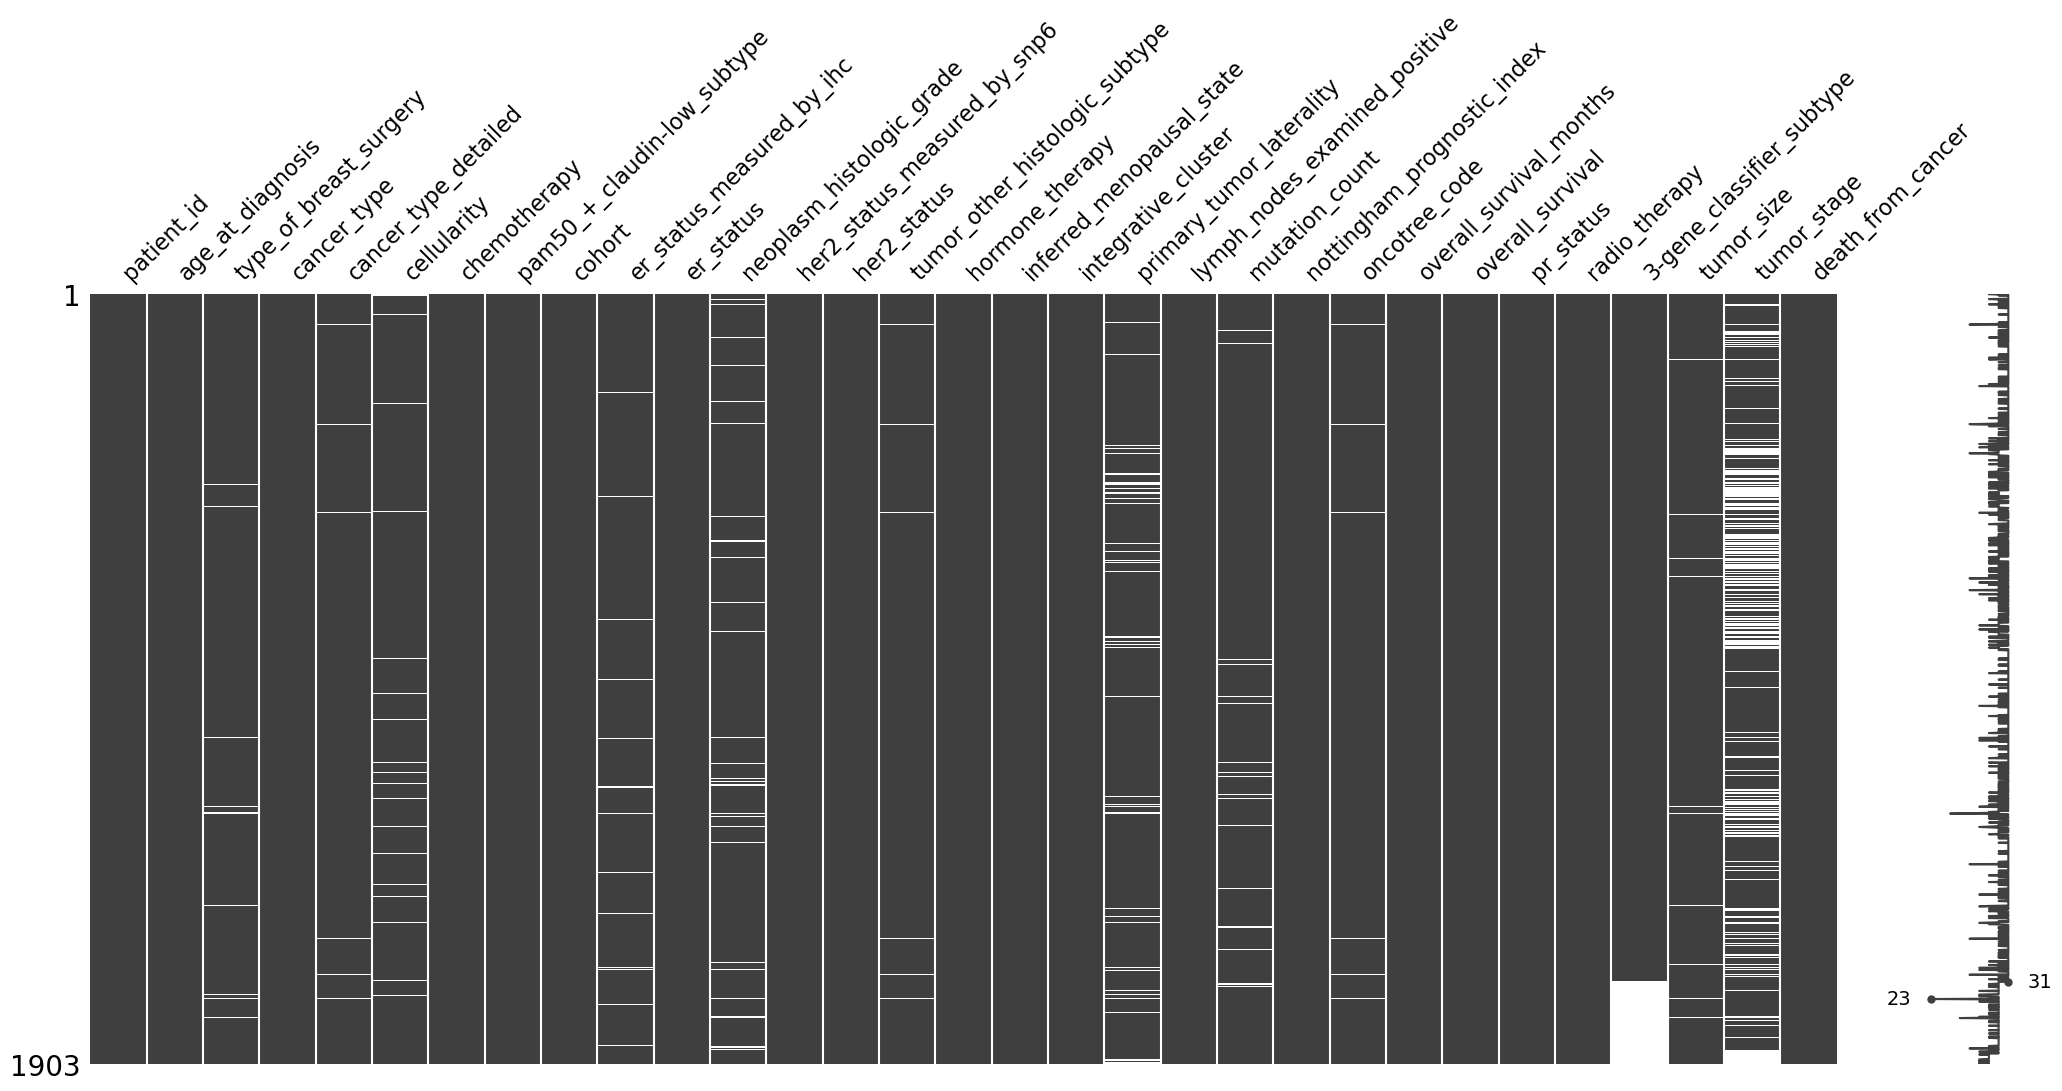

In [23]:
# Sorting by 3-gene_classifier_subtype, which is missing 11%:

clinical_data_sorted = clinical_data.sort_values(by = '3-gene_classifier_subtype')
msno.matrix(clinical_data_sorted)
plt.show()

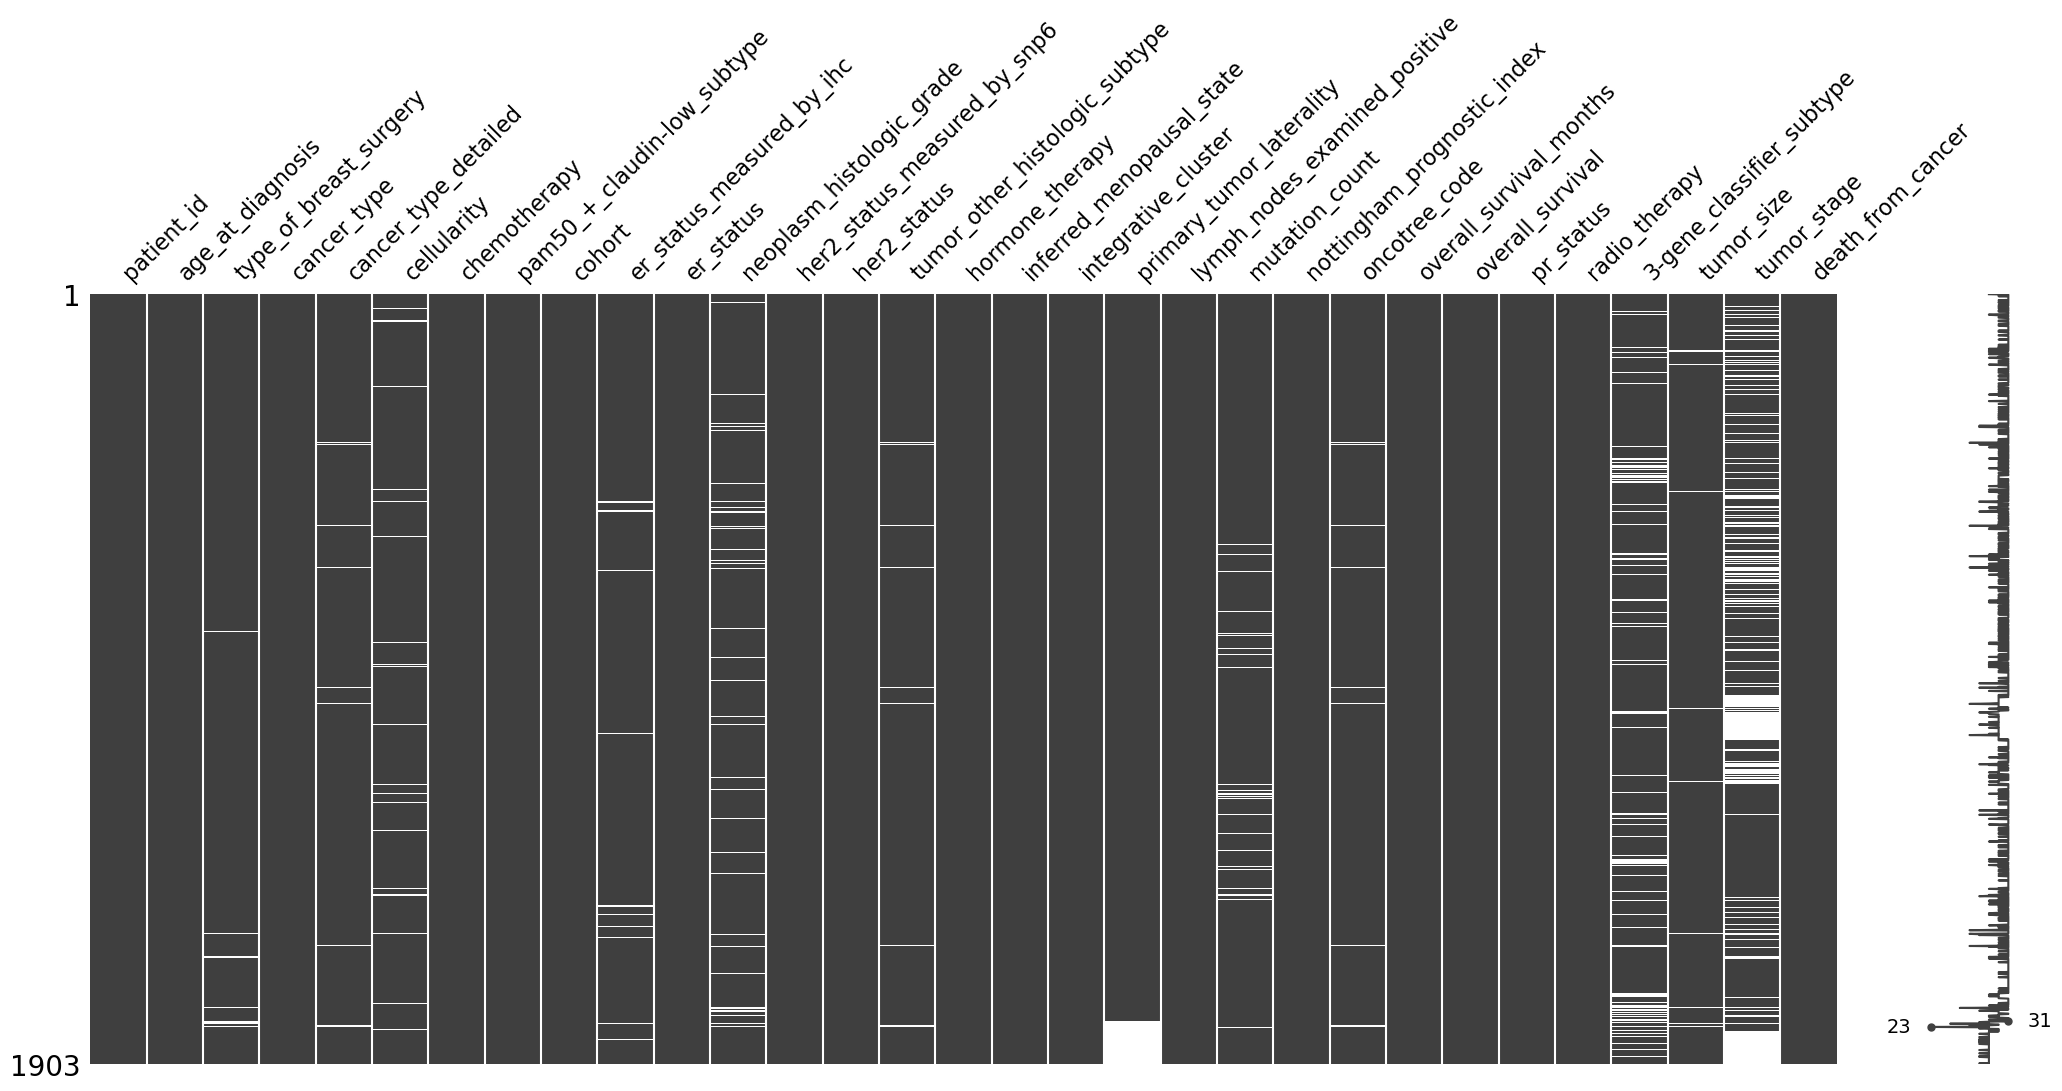

In [24]:
# Sorting by primary_tumor_laterality, which is missing 6%:

clinical_data_sorted = clinical_data.sort_values(by = 'primary_tumor_laterality')
msno.matrix(clinical_data_sorted)
plt.show()

The only pattern I see is that most of the patients that are missing data from 'primary_tumor_laterality' is also missing 'tumor_stage. I'd like to see if they are in the same cohort or if they have something else in common - will look at missing primary_tumor_laterality, as that's where the overlap is. 

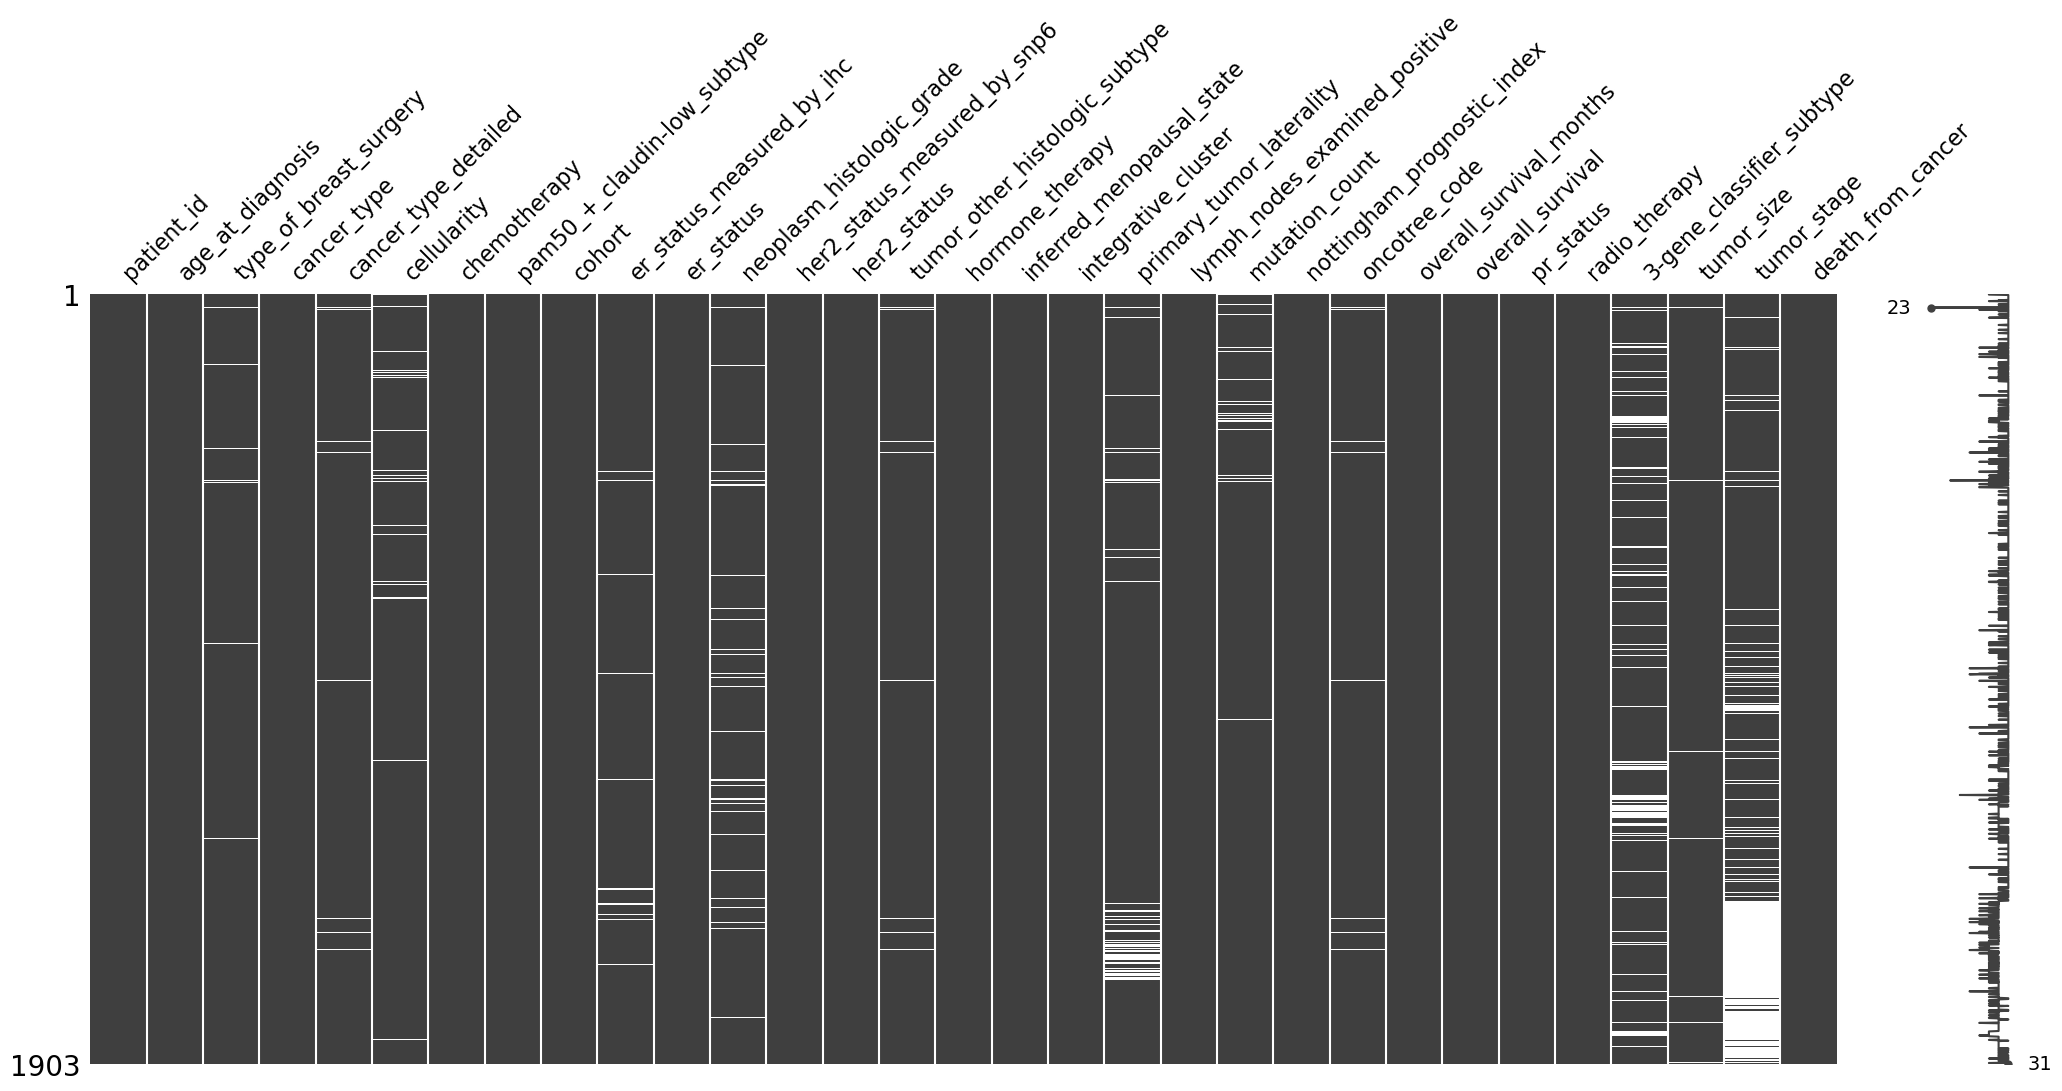

In [25]:
#want to look at missingness sorting by cohort

clinical_data_sorted = clinical_data.sort_values(by = 'cohort')
msno.matrix(clinical_data_sorted)
plt.show()

I do see some patterns when sorting by cohort, as it looks like some cohorts didn't record certain categeories of data. I'll look at this below. As it looks like most of the missing laterality data was from one cohort, and that overlaps with a big chunk of missing data in tumor_stage, I'm going to look at this first.

In [26]:
#isolate missing values for primary_tumor_laterality. I can see that there are 106 patients missing their laterality data, 
#and of these only 21 patients have stage data.

missing_laterality= clinical_data[clinical_data['primary_tumor_laterality'].isna()]

missing_laterality.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 36 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      106 non-null    int64  
 1   age_at_diagnosis                106 non-null    float64
 2   type_of_breast_surgery          95 non-null     object 
 3   cancer_type                     106 non-null    object 
 4   cancer_type_detailed            104 non-null    object 
 5   cellularity                     104 non-null    object 
 6   chemotherapy                    106 non-null    int64  
 7   pam50_+_claudin-low_subtype     106 non-null    object 
 8   cohort                          106 non-null    float64
 9   er_status_measured_by_ihc       100 non-null    object 
 10  er_status                       106 non-null    object 
 11  neoplasm_histologic_grade       103 non-null    float64
 12  her2_status_measured_by_snp6    10

In [27]:
# grouping the patients missing their primary_tumor_laterality by cohort to see if there are any patterns. 

missing_laterality_grouped=missing_laterality.groupby(by=["cohort"]).count()
missing_laterality_grouped.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
cohort,,,,,,,,,,,,,,,,,,,,,
1.0,18,18,7,18,16,17,18,18,16,18,...,18,16,18,18,18,18,14,15,14,18
2.0,7,7,7,7,7,6,7,7,7,7,...,7,7,7,7,7,7,6,7,7,7
4.0,81,81,81,81,81,81,81,81,77,81,...,81,81,81,81,81,81,73,81,0,81


I see that most of the missing data for laterality/staging is from cohort 4, and none from cohorts 3 or 5. Although I see above that there is clearly an issue with missing data and cohort 4, I want to check and see if there are other patterns with missing data in all the cohorts. 



In [28]:
#Making a dataframe to compare what percent of data is missing for each cohort. 

# I know I have 5 cohorts
cohort_list = [1, 2, 3, 4, 5]

#creating empty dataframe 
missing_data = pd.DataFrame()

#make a loop to calculate the percentage of missing data for each cohort and put in our new missing_data dataframe.
for cohort in cohort_list:
    # filter the data for the current cohort
    current_cohort = clinical_data[clinical_data['cohort'] == cohort]
    
    # calculate the missing data for the current cohort
    missing_current_cohort = pd.concat([current_cohort.isnull().sum(),100*current_cohort.isnull().mean()], axis=1)
    missing_current_cohort.columns=['Count', f'% Cohort {cohort}']
    missing_current_cohort = missing_current_cohort.sort_values(by='Count',ascending=False)
    
    # append the missing data for the current cohort to the results dataframe
    missing_data = pd.concat([missing_data, missing_current_cohort['% Cohort {0}'.format(cohort)]], axis=1)

# only display non-zero values    
missing_data = missing_data.loc[~(missing_data == 0).all(axis=1)]
missing_data


,% Cohort 1,% Cohort 2,% Cohort 3,% Cohort 4,% Cohort 5
3-gene_classifier_subtype,11.226611,8.041958,12.824011,5.932203,11.377246
mutation_count,8.939709,0.349650,0.136426,0.000000,0.000000
cellularity,4.781705,7.692308,0.818554,0.847458,0.598802
tumor_stage,3.950104,0.000000,14.324693,100.000000,84.431138
primary_tumor_laterality,3.742204,2.447552,0.000000,34.322034,0.000000
type_of_breast_surgery,3.326403,0.000000,0.818554,0.000000,0.000000
neoplasm_histologic_grade,2.910603,1.048951,6.139154,3.813559,0.598802
er_status_measured_by_ihc,1.871102,0.349650,1.773533,2.966102,0.000000
tumor_other_histologic_subtype,0.831601,0.000000,0.818554,2.118644,0.000000
oncotree_code,0.831601,0.000000,0.818554,2.118644,0.000000


Here I can see that Cohort 4 is missing quite a bit more data in most categories than the other cohorts (100% of tumor_stage, 34% of primary_tumor_laterality in particular). I also see that Cohort 5 is missing most of its tumor_stage data (84.4%) and more tumor_size (6%) than other cohorts. 

I don't want to remove any data at this point, but I will keep this in mind. It looks like NONE of the patients from cohort 4 had their tumor stage recorded, which is a serious data collection issue. 

I do want to see if there's an obvious way to impute missing tumor stage data from tumor size, as I suspect they are related. 

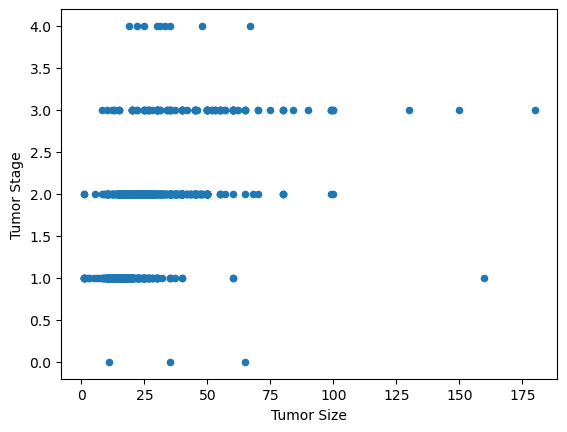

In [29]:
# plotting tumor size vs tumor stage to see what the relationship is. 

ax=clinical_data.plot(kind='scatter', x='tumor_size', y='tumor_stage')
ax.set_xlabel("Tumor Size")
ax.set_ylabel("Tumor Stage")
plt.show()

I do see some trends here but I think I'll need to do some sort of machine learning to impute this value if it ends up being important. There is too much overlap in staging for most tumor sizes to be able to impute stage from any single tumor size.

I do see one clear outlier: for a patient with tumor_stage of 1, the tumor_size is over 150. I suspect there might be an error in how the data was recorded, such as adding an extra '0' to the tumor_size. 

### 1.6.2 Datatypes    <a id= '1.6.2_Datatypes'></a>

The clinical_data seems to have a mix of datatypes, and I want to see if I need to convert any of them. 

In [30]:
#looking at datatypes for my clinical data
print(clinical_data.dtypes)

patient_id                          int64
age_at_diagnosis                  float64
type_of_breast_surgery             object
cancer_type                        object
cancer_type_detailed               object
cellularity                        object
chemotherapy                        int64
pam50_+_claudin-low_subtype        object
cohort                            float64
er_status_measured_by_ihc          object
er_status                          object
neoplasm_histologic_grade         float64
her2_status_measured_by_snp6       object
her2_status                        object
tumor_other_histologic_subtype     object
hormone_therapy                     int64
inferred_menopausal_state          object
integrative_cluster                object
primary_tumor_laterality           object
lymph_nodes_examined_positive     float64
mutation_count                    float64
nottingham_prognostic_index       float64
oncotree_code                      object
overall_survival_months           

In [31]:
#make loop to find unique values in each column, to see which should be converted to categorical data type.

for col in clinical_data:
    print('\n',col, ': ', clinical_data[col].unique())


 patient_id :  [   0    2    5 ... 7297 7298 7299]

 age_at_diagnosis :  [75.65 43.19 48.87 ... 43.1  42.88 60.02]

 type_of_breast_surgery :  ['MASTECTOMY' 'BREAST CONSERVING' nan]

 cancer_type :  ['Breast Cancer' 'Breast Sarcoma']

 cancer_type_detailed :  ['Breast Invasive Ductal Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma' 'Breast' nan
 'Metaplastic Breast Cancer']

 cellularity :  [nan 'High' 'Moderate' 'Low']

 chemotherapy :  [0 1]

 pam50_+_claudin-low_subtype :  ['claudin-low' 'LumA' 'LumB' 'Her2' 'Normal' 'Basal' 'NC']

 cohort :  [1. 2. 3. 5. 4.]

 er_status_measured_by_ihc :  ['Positve' 'Negative' nan]

 er_status :  ['Positive' 'Negative']

 neoplasm_histologic_grade :  [ 3.  2.  1. nan]

 her2_status_measured_by_snp6 :  ['NEUTRAL' 'LOSS' 'GAIN' 'UNDEF']

 her2_status :  ['Negative' 'Positive']

 tumor_other_histologic_subtype :  ['Ductal/NST' 'Mixed' 'Lobular' 'Tubular/ cribrifor

Looking at the above output, I can see columns that should NOT become categorical:
 * age_at_diagnosis 
 * lymph_nodes_examined_positive
 * integrative_cluster
 * mutation_count
 * nottingham_prognostic_index
 * overall_survival_months
 * tumor_size
 
 I will next write a loop that converts everything else to a category

In [32]:
# these are the features that should not be categorical:
not_cat = clinical_data[['age_at_diagnosis', 'lymph_nodes_examined_positive','integrative_cluster','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']]
not_cat.head()

# making a loop to make all other features be category datatype:
for col in clinical_data.columns:
    if col not in not_cat.columns:
        clinical_data[col]=clinical_data[col].astype('category')
print(clinical_data.dtypes)

patient_id                        category
age_at_diagnosis                   float64
type_of_breast_surgery            category
cancer_type                       category
cancer_type_detailed              category
cellularity                       category
chemotherapy                      category
pam50_+_claudin-low_subtype       category
cohort                            category
er_status_measured_by_ihc         category
er_status                         category
neoplasm_histologic_grade         category
her2_status_measured_by_snp6      category
her2_status                       category
tumor_other_histologic_subtype    category
hormone_therapy                   category
inferred_menopausal_state         category
integrative_cluster                 object
primary_tumor_laterality          category
lymph_nodes_examined_positive      float64
mutation_count                     float64
nottingham_prognostic_index        float64
oncotree_code                     category
overall_sur

In [33]:
# fixing other issues that I noticed in my data:

#I think age can be rounded to the year, as an int64
clinical_data['age_at_diagnosis']=clinical_data['age_at_diagnosis'].astype('int64')


#the word 'positive' was spelled incorrectly in this column...fixing
clinical_data['er_status_measured_by_ihc'] = clinical_data['er_status_measured_by_ihc'].replace('Positve','Positive')

# wanted to remove the decimal for cohort
clinical_data['cohort']=clinical_data['cohort'].astype('int64')
clinical_data['cohort']=clinical_data['cohort'].astype('category')


#lymph_nodes_examined_positive should be integer, not a float
clinical_data['lymph_nodes_examined_positive']=clinical_data['lymph_nodes_examined_positive'].astype('int64')

#couldn't convert to integer for mutation_count because of the NANs. Replace NAN with a '0' and convert to integer
clinical_data['mutation_count'] = clinical_data['mutation_count'].fillna(0).astype('int64')

# for  overall_survival_months there are too many decimal places. I think we are ok with just 1. 
clinical_data['overall_survival_months']=clinical_data['overall_survival_months'].round(1)



In [34]:
#checking my datatypes after converting many of them.

clinical_data.dtypes

patient_id                        category
age_at_diagnosis                     int64
type_of_breast_surgery            category
cancer_type                       category
cancer_type_detailed              category
cellularity                       category
chemotherapy                      category
pam50_+_claudin-low_subtype       category
cohort                            category
er_status_measured_by_ihc         category
er_status                         category
neoplasm_histologic_grade         category
her2_status_measured_by_snp6      category
her2_status                       category
tumor_other_histologic_subtype    category
hormone_therapy                   category
inferred_menopausal_state         category
integrative_cluster                 object
primary_tumor_laterality          category
lymph_nodes_examined_positive        int64
mutation_count                       int64
nottingham_prognostic_index        float64
oncotree_code                     category
overall_sur

In [35]:
# let's now look at our dataframe to make sure it looks as it should:

# set the display options to show all columns
pd.set_option('display.max_columns', None)

clinical_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positive,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10,0,6.044,IDC,140.5,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positive,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0,2,4.020,IDC,84.6,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positive,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1,2,4.030,IDC,163.7,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positive,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3,1,4.050,MDLC,164.9,1,Positive,1,NaN,25.0,2.0,Living
4,8,76,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positive,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8,2,6.080,MDLC,41.4,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


## 1.7 Z Scores Wrangling:   <a id= '1.7z_scores'></a>

In my initial look at the data, I didn't see anything obvious that needed to be looked at with my genes data, but this section is to confirm. 

In [64]:
# looking at data types. 
z_scores.dtypes

patient_id      int64
brca1         float64
brca2         float64
palb2         float64
pten          float64
               ...   
tnk2          float64
tulp4         float64
ugt2b15       float64
ugt2b17       float64
ugt2b7        float64
Length: 490, dtype: object

In [37]:
# looking at info for z_scores. Everything is a 
z_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1903
Columns: 490 entries, patient_id to ugt2b7
dtypes: float64(489), int64(1)
memory usage: 7.2 MB


In [38]:
# describing z_scores to see how the data is distributed. There is too much here to be able to discern anything from just 
#looking at it, in the next section I'll look at this in more detail. 
z_scores.describe()

,patient_id,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000

## 1.8 Gene Mutations Wrangling:    <a id= '1.8genes'></a>

In my initial look at the data, I saw there was no missing data, but I need to check datatypes here. 


In [40]:
#checking the datatype

genes.dtypes


patient_id      int64
pik3ca_mut     object
tp53_mut       object
muc16_mut      object
ahnak2_mut     object
                ...  
hras_mut       object
prps2_mut      object
smarcb1_mut    object
stmn2_mut      object
siah1_mut      object
Length: 174, dtype: object

Everything is an object, which probably isn't what we want. If all the mutations are unique that's fine, but I suspect they aren't. Let's look at the gene mutations to see if there are repeats:

In [56]:
#making a for loop over all the columns except patient id
for col in genes.columns[1:]:
    # filter out the '0' values
    col_no_zeros = genes[col][genes[col] != '0']
    # group the unique values by count
    counts = col_no_zeros.value_counts()

    print('\n', col, ':')
    print(counts)


 pik3ca_mut :
H1047R            284
E545K             127
E542K              72
N345K              42
H1047L             29
                 ... 
Y1021H V105del      1
E542K N345K         1
E970K M1043I        1
G1007R              1
R93L                1
Name: pik3ca_mut, Length: 159, dtype: int64

 tp53_mut :
R175H          34
R248Q          20
R248W          17
R213*          15
R306*          12
               ..
C277F           1
R280T E326Q     1
H179Q H178Q     1
G108Vfs*13      1
D281A           1
Name: tp53_mut, Length: 342, dtype: int64

 muc16_mut :
L7102F           5
T7149A           4
D4992G           3
V8260M           3
D902A            3
                ..
D902A T1778I     1
E3930K A8196S    1
V3127F           1
S4799N           1
A9110S           1
Name: muc16_mut, Length: 297, dtype: int64

 ahnak2_mut :
V2061L    34
G812A      5
H1235P     3
G400S      3
D2099Y     3
          ..
S2509C     1
S5515L     1
E2173Q     1
S269R      1
A860E      1
Name: ahnak2_mut, Leng

There ARE lots of repeats- we will now convert this data into category type (not patient_id).

In [60]:
# this is a list of the columns to convert to category type, excluding patient_id
genes_convert = [col for col in genes.columns if col != 'patient_id']

# loop through the columns and convert them to category data type
for col in genes_convert:
    genes[col] = genes[col].astype('category')


Looking at the info for the genes dataframe. I see that there are 173 category datatypes, and 1 integer, so it looks like this worked as we wanted.

In [61]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1903
Columns: 174 entries, patient_id to siah1_mut
dtypes: category(173), int64(1)
memory usage: 744.7 KB


In [63]:
#looking at the data again to make sure it all looks good. 
genes.head()

,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,shank2_mut,ep300_mut,ptprd_mut,usp9x_mut,setd2_mut,setd1a_mut,thsd7a_mut,afdn_mut,erbb3_mut,rb1_mut,myo1a_mut,alk_mut,fanca_mut,adgra2_mut,ubr5_mut,pik3r1_mut,myo3a_mut,asxl2_mut,apc_mut,ctcf_mut,asxl1_mut,fancd2_mut,taf1_mut,kdm6a_mut,ctnna3_mut,brca1_mut,ptprm_mut,foxo3_mut,usp28_mut,gldc_mut,brca2_mut,cacna2d3_mut,arid2_mut,aff2_mut,lifr_mut,sbno1_mut,kdm3a_mut,ncoa3_mut,bap1_mut,l1cam_mut,pbrm1_mut,chd1_mut,jak1_mut,setdb1_mut,fam20c_mut,arid5b_mut,egfr_mut,map3k10_mut,smarcc2_mut,erbb4_mut,npnt_mut,nek1_mut,agmo_mut,zfp36l1_mut,smad4_mut,sik1_mut,casp8_mut,prkcq_mut,smarcc1_mut,palld_mut,dcaf4l2_mut,bcas3_mut,cdkn1b_mut,gps2_mut,men1_mut,stk11_mut,sik2_mut,ptpn22_mut,brip1_mut,flt3_mut,nrg3_mut,fbxw7_mut,ttyh1_mut,taf4b_mut,or6a2_mut,map3k13_mut,hdac9_mut,prkacg_mut,rpgr_mut,large1_mut,foxp1_mut,clk3_mut,prkcz_mut,lipi_mut,ppp2r2a_mut,prkce_mut,gh1_mut,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,H178P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A499Gfs*16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,H1047R,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,L1463P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,E542K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,S241F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F2321Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I can see I have 173 columnns of gene mutation data. Each column is the name of a gene, and the patient data under it is the specific mutation they have on that gene. The zeros indicate they don't have a mutation on that gene. 

## 1.9 Merging our data frames back together: <a id= '1.9merge'></a>

Separating our data into 3 dataframes helped figure out how the features are distributed, and made wrangling the clinical data much easier. However, now it's time to put it all back together. 

In [44]:
#merging the 3 datasets back into one, cancer_data:
cancer_data = pd.merge(clinical_data, z_scores, on='patient_id')
cancer_data = pd.merge(cancer_data, genes, on='patient_id')

cancer_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,sha

Next, we compare the info for our original dataframe raw_data, and our wrangled dataframe cancer_data. I see that raw_data and cancer_data contain the same number of rows and columns, but that the dtypes are different. This is exactly what I expect and want.

In [45]:
print('RAW_DATA INFO:\n')
print(raw_data.info())

RAW_DATA INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB
None


In [46]:
print('CANCER_DATA INFO:\n')
print(cancer_data.info())

CANCER_DATA INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1902
Columns: 693 entries, patient_id to siah1_mut
dtypes: category(23), float64(492), int64(4), object(174)
memory usage: 9.8+ MB
None


I would still like to spot-check to make sure that nothing got mixed up. Below I'm taking a sample of each dataframe, and comparing them. There are no differences between the dataframes, so I think we are good to continue. 

In [47]:
# select a random sample of 10 rows from cancer_data
sample_cancer_data = cancer_data.sample(n=10)

# select the corresponding rows from raw_data
sample_raw_data = raw_data.loc[sample_cancer_data.index]

# compare the two dataframes. #I'm selecting a column from each section of my data to create sample dataframes for comparison.
sample_cancer_data=sample_cancer_data[['patient_id','brca1','tp53_mut']]
print('Sample of Cancer Data: ',sample_cancer_data.head())

sample_raw_data=sample_raw_data[['patient_id','brca1','tp53_mut']]
print('\nSample of Raw Data: ',sample_raw_data.head())

# Subtracting the dataframes from each other to see if there are differences. 
diff_dfs=set(sample_cancer_data)-set(sample_raw_data)
print('\nDifferences between the dataframes: ',diff_dfs)

Sample of Cancer Data:        patient_id   brca1 tp53_mut
1632        6263 -0.6321        0
1824        7187 -0.2489    C242S
1266        5287  0.2810        0
762         3865 -0.1454        0
957         4738 -1.8233        0

Sample of Raw Data:        patient_id   brca1 tp53_mut
1632        6257  1.5636        0
1824        7186  2.7183        0
1266        5284 -0.2887        0
762         3865 -0.1454        0
957         4738 -1.8233        0

Differences between the dataframes:  set()


## 1.10 Exporting the Cleaned Dataframe   <a id= '1.10_Export'></a>

In [48]:
#exporting the cleaned dataframe

cancer_data.to_csv(r'C:\Users\leann\OneDrive\Desktop\SPRINGBOARD\capstone 2\cancer_data_cleaned.csv', encoding='utf-8')


## 1.11 Summary   <a id= '1.11_Summary'></a>

This dataset is essentially three datasets merged into one: clinical data, z scores, and gene mutations. In my initial look at the data, I saw that the clinical data was the main section with inconsistent datatypes and missing data. It was easier to wrangle the data by section to make sure that I didn’t miss any patterns, and was also able to get the parameters for each section more easily when it was split apart. The 3 new dataframes were called clinical_data, z_scores and genes. z_scores looked to be fine as-is, without any glaring mistakes or inconsistencies that I could find. 

Upon inspecting the missing data in clinical_data, I did discover that 2 of the 5 cohorts had consistent issues recording data for multiple features. In particular, Cohort 4 was missing 100% of tumor_stage, and 34% of primary_tumor laterality, and Cohort 5 was missing 84% of tumor stage, and 6% of tumor size. All cohorts were missing between 6 and 13% of the 3-gene_classifier_subtype data. 

I plotted tumor_size vs tumor_stage to see if I could impute the tumor_stage data, and I see a significant outlier that may need to be removed later; the rightmost point for tumor stage 1.0. I suspect that an extra 0 was added to this number. 

I also changed many of the datatypes for the columns in clinical_data. There were some floats that needed to be integers, and the majority of the columns were converted to categories. The category that will be the most important later, as our ultimate goal is to determine if a patient will die of cancer or not, is ‘death_from_cancer’. We are missing one value here, so I removed that row. That patient died, and we cannot know if they died of cancer or other causes. 

The genes dataframe was converted into the datatype ‘category’, because I saw that many of the gene mutations repeated. 

At the end, I merged the 3 dataframes back together into cancer_data. I checked to make sure that the dataframe was consistent with the original dataframe, and no errors or unwanted changes were introduced. 

The wrangled cancer_data dataframe has 1903 rows and 693 columns. There is a unique patient_id for each row. There is still missing data in the clinical_data section, but not elsewhere. 

The ‘sub dataframes’ that I worked with before each have 1903 rows, and the following columns, not counting patient_id:

clinical_data:30

z_scores: 489

genes: 173

DATATYPES

here I will break it down by the sub-dataframe.

Clinical_data: all category except: 
* age_at_diagnosis (integer)
* lymph_nodes_examined_positive (integer)
* integrative_cluster (object)
* mutation_count (integer)
* nottingham_prognostic_index (float)
* overall_survival_months (float)
* tumor_size (float)

Z_scores: float

Genes: category



## 1.12 Next Steps   <a id= '1.12_Next'></a>

The next stage will be exploratory data analysis, which is in the notebook 'capstone2_EDA'